In [757]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [758]:
# Reading data into python environment
df = pd.read_csv('train_ctrUa4K.csv')

### Exploratory data Analysis

In [759]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [760]:
df.shape

(614, 13)

In [761]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [762]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [763]:
freqgraph = df.select_dtypes(include = ['float','int'])

In [764]:
freqgraph

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


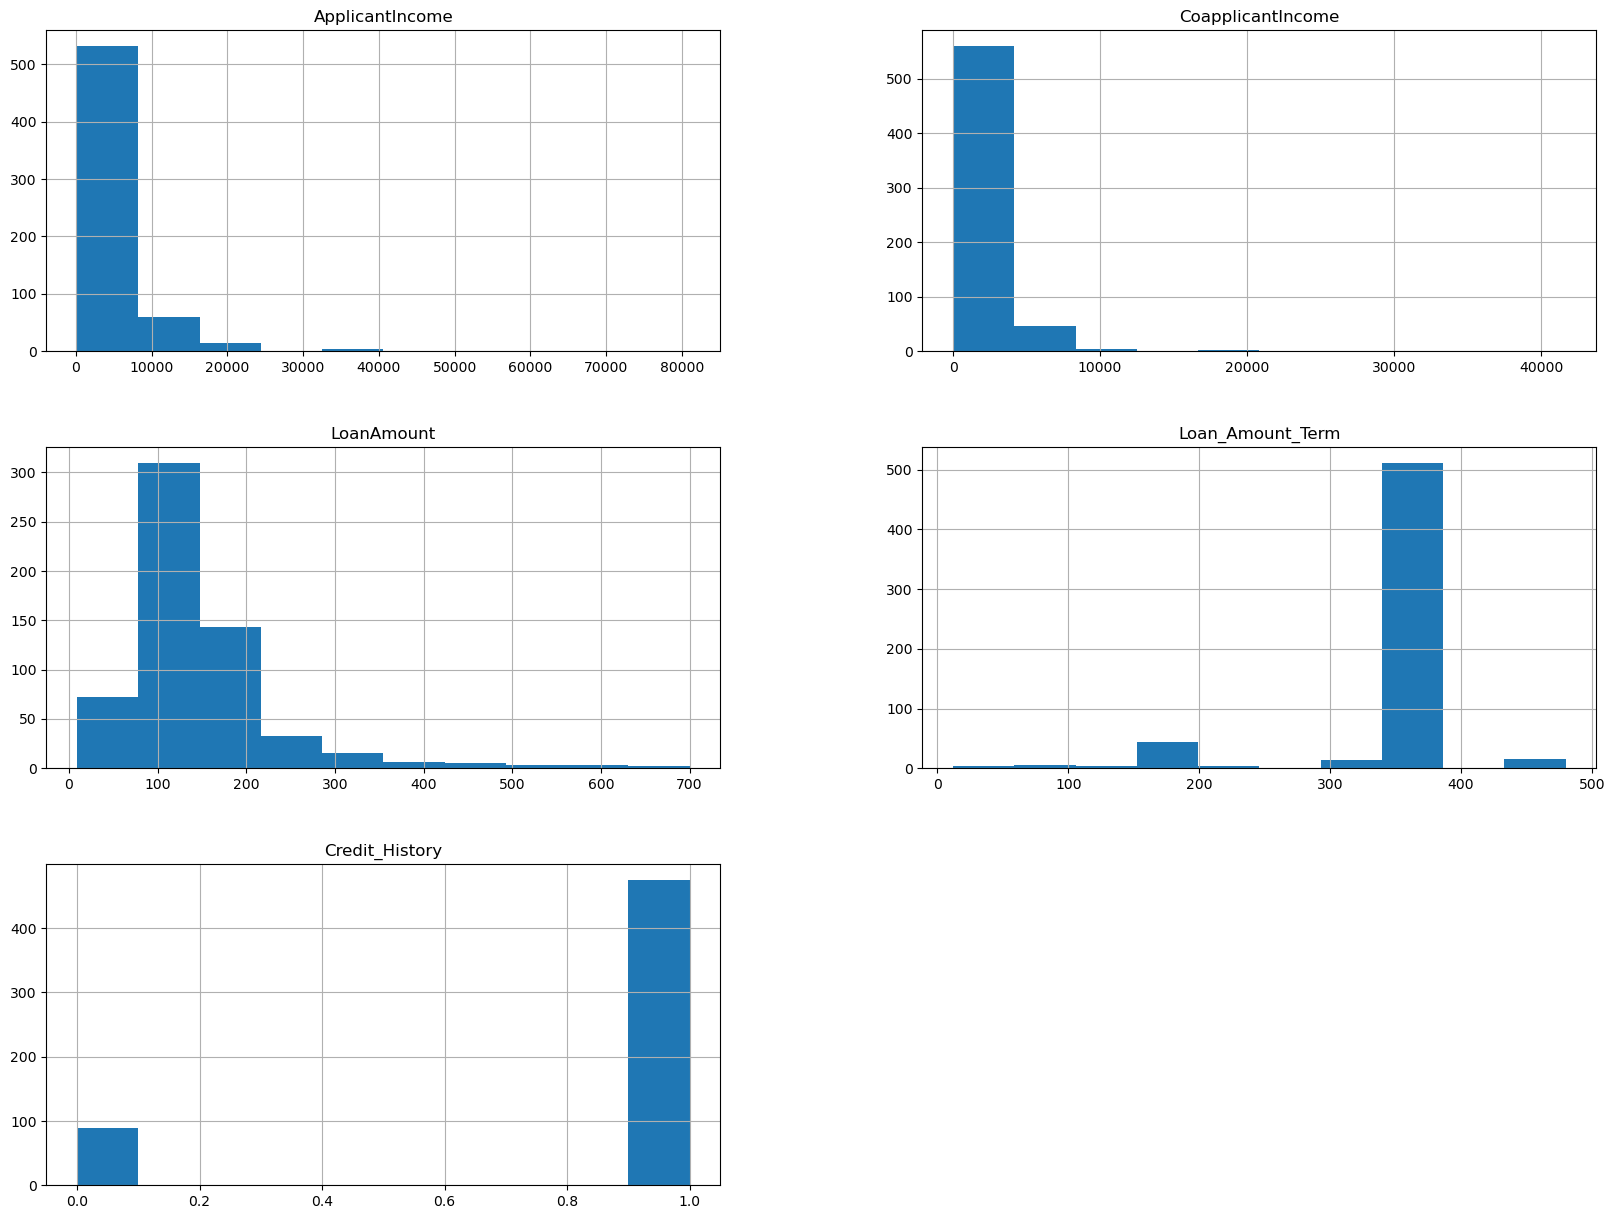

In [765]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [766]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [767]:
df.Loan_ID.nunique()

614

### Preprocessing

In [768]:
# Filling the missing values of object columns with mode
for i in ['Gender','Married','Dependents','Self_Employed']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [769]:
# Filling the missing values of float columns with median
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    df[i] = df[i].fillna(df[i].median())

In [770]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [771]:
# Removing Loan_ID column since it is unique
df1 = df.drop("Loan_ID",axis =1)

In [772]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking Outliers

Text(0.5, 1.0, 'Boxplot of Applicant Income column')

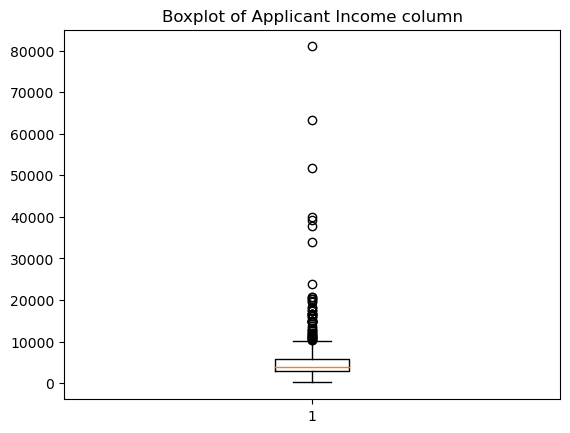

In [773]:
# Detecting outliers in Fare column using IQR method
plt.boxplot(df1['ApplicantIncome'])
plt.title('Boxplot of Applicant Income column')

In [774]:
# Finding outliers of Applicant Income column
Q1 = np.percentile(df1['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(df1['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(df1['ApplicantIncome'],75,interpolation='midpoint')

In [775]:
print(Q1)
print(Q2)
print(Q3)

2879.0
3812.5
5790.0


In [776]:
df1['ApplicantIncome'].median()

3812.5

In [777]:
IQR =Q3 -Q1
print(IQR)

2911.0


In [778]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

-1487.5
10156.5


In [779]:
outlier = []
for x in df1['ApplicantIncome']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [780]:
# Finding the index of outliers
ind1 = df1[(df1["ApplicantIncome"] > up_limit)|(df1["ApplicantIncome"] < low_limit)].index
ind1

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [781]:
# Detecting outliers in CoapplicantIncome column using IQR method

Text(0.5, 1.0, 'Boxplot of Co-Applicant Income column')

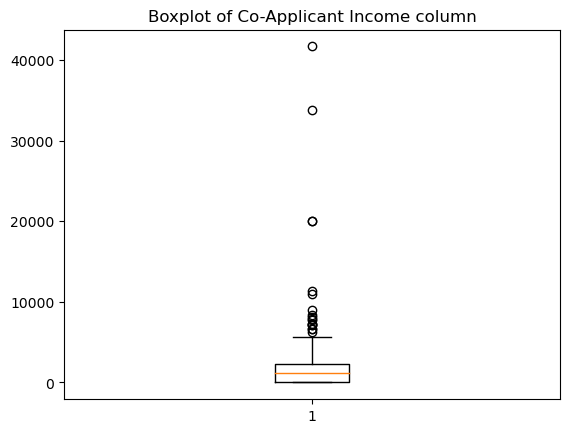

In [782]:
plt.boxplot(df1['CoapplicantIncome'])
plt.title('Boxplot of Co-Applicant Income column')

In [783]:
# Finding outliers of Co-Applicant Income column
Q1 = np.percentile(df1['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(df1['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(df1['CoapplicantIncome'],75,interpolation='midpoint')

In [784]:
print(Q1)
print(Q2)
print(Q3)

0.0
1188.5
2292.5


In [785]:
df1['CoapplicantIncome'].median()

1188.5

In [786]:
IQR =Q3 -Q1
print(IQR)

2292.5


In [787]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

-3438.75
5731.25


In [788]:
outlier = []
for x in df1['CoapplicantIncome']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [789]:
# Finding the index of outliers
ind2= df1[(df1["CoapplicantIncome"] > up_limit)|(df1["CoapplicantIncome"] < low_limit)].index
ind2

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

In [790]:
# Detecting outliers in LoanAmount column using IQR method

Text(0.5, 1.0, 'Boxplot of Loan Amount column')

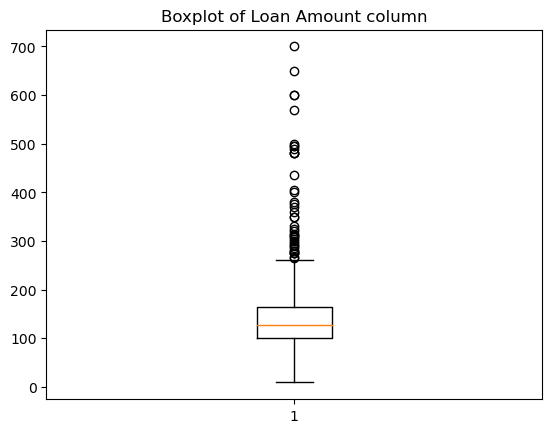

In [791]:
plt.boxplot(df1['LoanAmount'])
plt.title('Boxplot of Loan Amount column')

In [792]:
# Finding outliers of Co-Applicant Income column
Q1 = np.percentile(df1['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(df1['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(df1['LoanAmount'],75,interpolation='midpoint')

In [793]:
print(Q1)
print(Q2)
print(Q3)

100.5
128.0
164.5


In [794]:
df1['LoanAmount'].median()

128.0

In [795]:
IQR =Q3 -Q1
print(IQR)

64.0


In [796]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

4.5
260.5


In [797]:
outlier = []
for x in df1['LoanAmount']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [798]:
# Finding the index of outliers
ind3= df1[(df1["LoanAmount"] > up_limit)|(df1["LoanAmount"] < low_limit)].index
ind3

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [799]:
# Detecting outliers in Loan Amount Term column using IQR method

Text(0.5, 1.0, 'Boxplot of Loan Amount Term column')

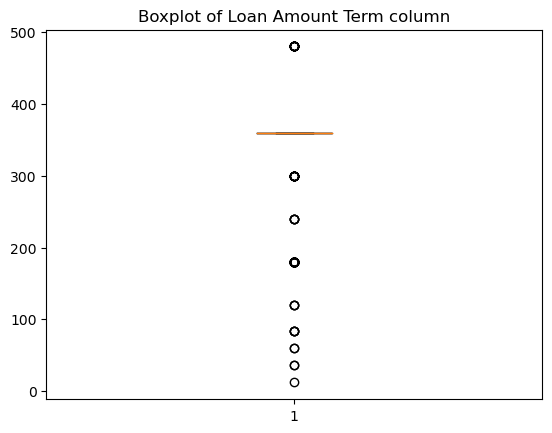

In [800]:
plt.boxplot(df1['Loan_Amount_Term'])
plt.title('Boxplot of Loan Amount Term column')

In [801]:
# Finding outliers of Co-Applicant Income column
Q1 = np.percentile(df1['Loan_Amount_Term'],25,interpolation='midpoint')
Q2 = np.percentile(df1['Loan_Amount_Term'],50,interpolation='midpoint')
Q3 = np.percentile(df1['Loan_Amount_Term'],75,interpolation='midpoint')

In [802]:
print(Q1)
print(Q2)
print(Q3)

360.0
360.0
360.0


In [803]:
df1['Loan_Amount_Term'].median()

360.0

In [804]:
IQR =Q3 -Q1
print(IQR)

0.0


In [805]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

360.0
360.0


In [806]:
outlier = []
for x in df1['Loan_Amount_Term']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [807]:
# Finding the index of outliers
ind4= df1[(df1["Loan_Amount_Term"] > up_limit)|(df1["Loan_Amount_Term"] < low_limit)].index
ind4

Int64Index([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100,
            109, 115, 128, 130, 133, 142, 144, 155, 164, 168, 171, 172, 179,
            182, 186, 189, 202, 228, 231, 241, 242, 245, 247, 248, 253, 262,
            282, 286, 293, 298, 313, 315, 333, 334, 355, 358, 363, 366, 372,
            373, 375, 378, 385, 393, 400, 401, 408, 429, 435, 444, 451, 453,
            461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539, 540, 546,
            554, 573, 575, 585, 590, 591, 593, 600, 605, 610],
           dtype='int64')

In [808]:
# Detecting outliers in Credit_History Term column using IQR method

Text(0.5, 1.0, 'Boxplot of Credit History column')

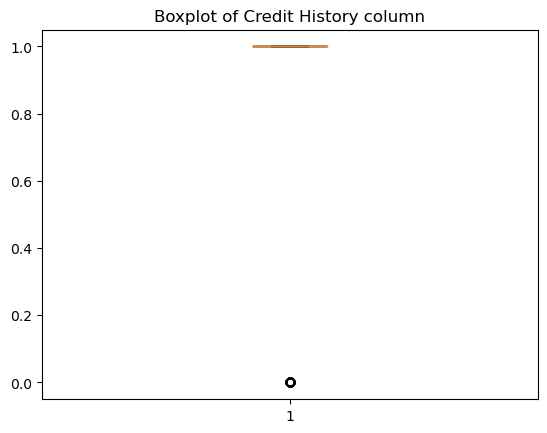

In [809]:
plt.boxplot(df1['Credit_History'])
plt.title('Boxplot of Credit History column')

In [810]:
# Finding outliers of Co-Applicant Income column
Q1 = np.percentile(df1['Credit_History'],25,interpolation='midpoint')
Q2 = np.percentile(df1['Credit_History'],50,interpolation='midpoint')
Q3 = np.percentile(df1['Credit_History'],75,interpolation='midpoint')

In [811]:
print(Q1)
print(Q2)
print(Q3)

1.0
1.0
1.0


In [812]:
df1['Credit_History'].median()

1.0

In [813]:
IQR =Q3 -Q1
print(IQR)

0.0


In [814]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

1.0
1.0


In [815]:
outlier = []
for x in df1['Credit_History']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [816]:
# Finding the index of outliersCredit_History
ind5 = df1[(df1["Credit_History"] > up_limit)|(df1["Credit_History"] < low_limit)].index
ind5

Int64Index([  7,  17,  20,  22,  23,  36,  48,  54,  62,  63,  64,  66,  69,
             73,  78, 108, 112, 122, 128, 138, 150, 155, 162, 168, 177, 179,
            180, 186, 201, 211, 218, 220, 250, 254, 256, 267, 280, 291, 293,
            300, 307, 325, 326, 338, 346, 353, 358, 367, 373, 387, 396, 399,
            400, 408, 409, 412, 414, 421, 423, 431, 438, 448, 450, 452, 453,
            464, 466, 471, 477, 486, 494, 499, 517, 527, 532, 541, 548, 550,
            553, 554, 564, 567, 569, 571, 576, 584, 589, 597, 613],
           dtype='int64')

In [817]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [818]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


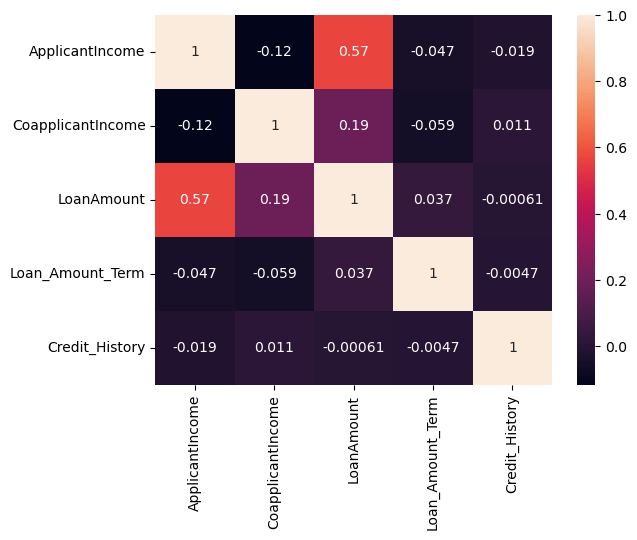

In [819]:
sns.heatmap(df1.corr(),annot=True);

### Encoding

In [820]:
# Label Encoding
# Label Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [821]:
for i in ['Self_Employed','Loan_Status','Dependents','Education','Married','Gender','Property_Area']:
    df1[i]=le.fit_transform(df1[i])

In [822]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [823]:
df2 = df1.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)

In [824]:
df3 = df1[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [825]:
df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Scaling

In [826]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()

In [827]:
df4 =stdsclr.fit_transform(df2)

In [828]:
df4

array([[ 0.07299082, -0.55448733, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.03873155, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.39374734, -0.55448733, -0.94899647,  0.2732313 ,  0.41173269],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847,  0.2732313 ,  0.41173269],
       [ 0.35706382, -0.55448733,  0.49081614,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.55448733, -0.15174486,  0.2732313 , -2.42876026]])

In [829]:
df4 = pd.DataFrame(df4,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [830]:
df4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,-0.211241,0.273231,0.411733
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733
3,-0.462062,0.251980,-0.306435,0.273231,0.411733
4,0.097728,-0.554487,-0.056551,0.273231,0.411733


In [831]:
#concatenating target & encoded columns with scaled columns.
df4 =pd.concat([df3,df4], axis =1)

In [832]:
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,0.072991,-0.554487,-0.211241,0.273231,0.411733
1,1,1,1,0,0,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733
2,1,1,0,0,1,2,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733
3,1,1,0,1,0,2,1,-0.462062,0.251980,-0.306435,0.273231,0.411733
4,1,0,0,0,0,2,1,0.097728,-0.554487,-0.056551,0.273231,0.411733


In [833]:
df4.shape

(614, 12)

### Splitting features and Target

In [834]:
x=df4.drop('Loan_Status',axis=1)
y=df4['Loan_Status']

In [835]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=0.25,random_state = 42)

### Modelling

### Logistic Regression

In [836]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [837]:
model=lr.fit(xtrain,ytrain)

In [838]:
ypred = model.predict(xtest)

In [839]:
# checking the validation of the model
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [840]:
print(confusion_matrix(ytest,ypred))

[[21 33]
 [ 2 98]]


In [841]:
# find the accuracy of the model
print(accuracy_score(ytest,ypred)) 

0.7727272727272727


### KNN

In [842]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model_knn =knn.fit(xtrain,ytrain)
  y_pred_knn = model_knn.predict(xtest)
  acc=accuracy_score(ytest,y_pred_knn)
  metric_k.append(acc)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [843]:
# accuracy array
metric_k 

[0.7467532467532467,
 0.7012987012987013,
 0.7597402597402597,
 0.7142857142857143,
 0.7662337662337663,
 0.7402597402597403,
 0.7857142857142857,
 0.7792207792207793,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857]

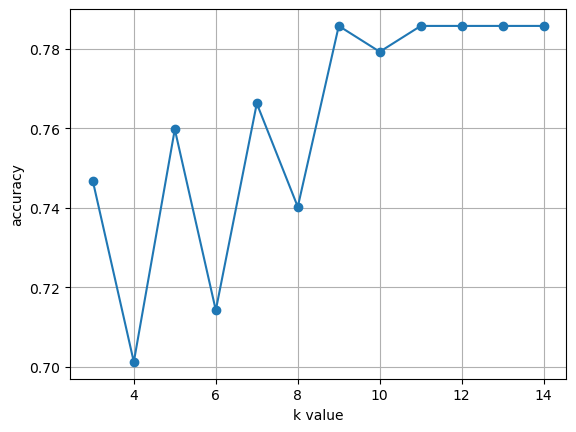

In [844]:
#plotting the accuracy for each k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [845]:
# accuracy is more for point 9 so we can create model using k=9
knn = KNeighborsClassifier(n_neighbors=9)
model_knn =knn.fit(xtrain,ytrain)
y_pred_knn=model_knn.predict(xtest)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [846]:
print(confusion_matrix(ytest,y_pred_knn))

[[22 32]
 [ 1 99]]


In [847]:
print(accuracy_score(ytest,y_pred_knn))

0.7857142857142857


### SVM

In [848]:
from sklearn.svm import SVC

#### SVM kernel= rbf

In [849]:
svm_clf = SVC(kernel = 'rbf' )

In [850]:
model1 = svm_clf.fit(xtrain,ytrain)

In [851]:
ypred = model1.predict(xtest)

In [852]:
# checking efficiency of the model
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(ytest,ypred)

array([[22, 32],
       [ 1, 99]], dtype=int64)

In [853]:
accuracy_score(ytest,ypred)

0.7857142857142857

#### SVM kernel=linear

In [854]:
svm_clf_linear=SVC(kernel='linear')

In [855]:
svm_model_linear=svm_clf.fit(xtrain,ytrain)

In [856]:
y_pred_svm_linear =svm_model_linear.predict(xtest)

In [857]:
confusion_matrix(ytest,y_pred_svm_linear)

array([[22, 32],
       [ 1, 99]], dtype=int64)

In [858]:
accuracy_score(ytest,y_pred_svm_linear)

0.7857142857142857

#### SVM kernel=polynomial

In [859]:
svm_clf_linear=SVC(kernel='poly')

In [860]:
svm_model_poly=svm_clf.fit(xtrain,ytrain)

In [861]:
y_pred_svm_poly=svm_model_poly.predict(xtest)

In [862]:
confusion_matrix(ytest,y_pred_svm_poly)

array([[22, 32],
       [ 1, 99]], dtype=int64)

In [863]:
accuracy_score(ytest,y_pred_svm_poly)

0.7857142857142857

### Decision Trees

In [864]:
from sklearn.tree import DecisionTreeClassifier

In [865]:
#creating an instance
dt_clf = DecisionTreeClassifier(random_state =42)

In [866]:
#fitting the model
dt_clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [867]:
ypred = dt_clf.predict(xtest)

In [868]:
#evaluating model
confusion_matrix(ytest,ypred)

array([[22, 32],
       [22, 78]], dtype=int64)

In [869]:
accuracy_score(ytest, ypred)

0.6493506493506493

### Random Forest

In [870]:
from sklearn.ensemble import RandomForestClassifier

In [871]:
rf_clf = RandomForestClassifier(random_state=42)

In [872]:
rf_clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [873]:
ypred = rf_clf.predict(xtest)

In [874]:
confusion_matrix(ytest,ypred)

array([[24, 30],
       [ 7, 93]], dtype=int64)

In [875]:
accuracy_score(ytest,ypred)

0.7597402597402597

In [876]:
# KNN and SVM is having same highest accuracy compared to other models

### Loading test dataset

In [877]:
df_test = pd.read_csv('test_lAUu6dG.csv')

### Exploratory data Analysis

In [878]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [879]:
df_test.shape

(367, 12)

In [880]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [881]:
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [882]:
freqgraph = df.select_dtypes(include = ['float','int'])

In [883]:
freqgraph

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


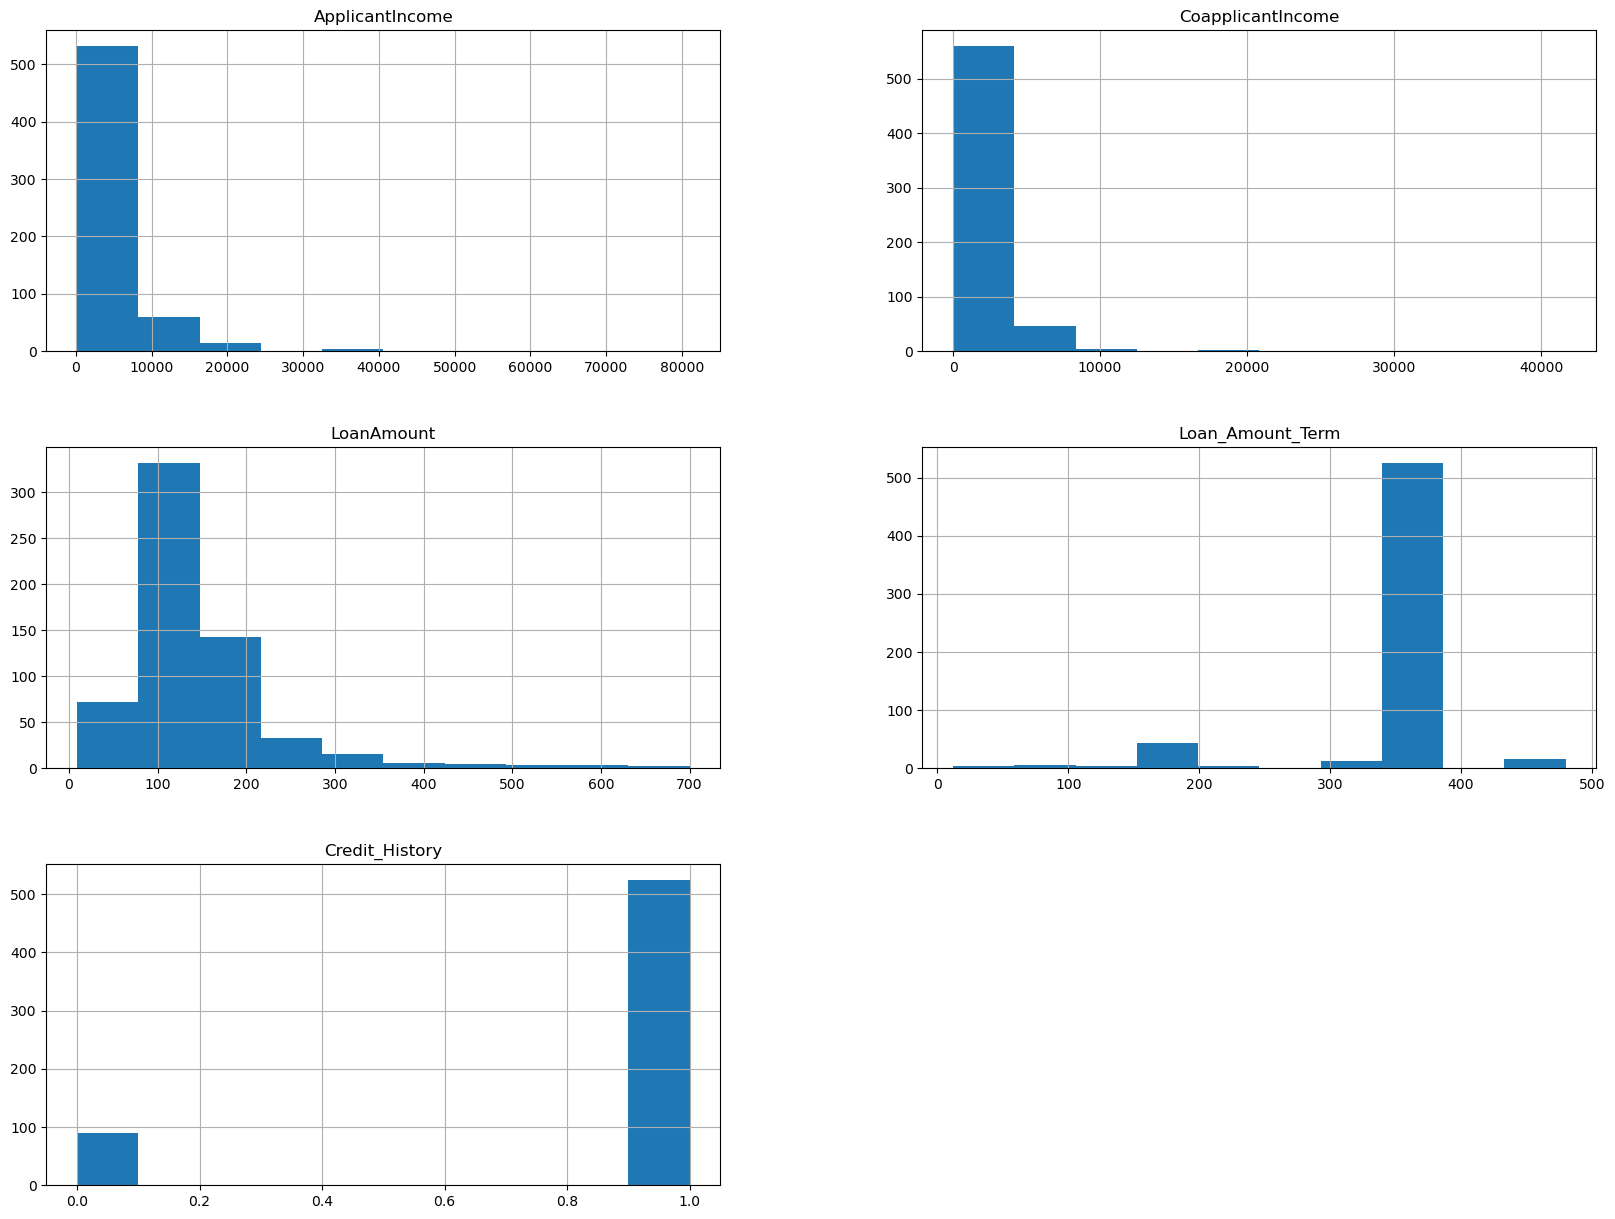

In [884]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [885]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### Preprocessing

In [886]:
# Filling the missing values of object columns with mode
for i in ['Gender','Dependents','Self_Employed']:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [887]:
# Filling the missing values of float columns with median
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    df_test[i] = df_test[i].fillna(df_test[i].median())

In [888]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [889]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Encoding

In [890]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [891]:
for i in ['Self_Employed','Dependents','Education','Married','Gender','Property_Area']:
    df_test[i]=le.fit_transform(df_test[i])

In [892]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [893]:
df_test1 = df_test.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [894]:
df_test2 = df_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']]

In [895]:
df_test1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Scaling

In [896]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()

In [897]:
df_test3 = stdsclr.fit_transform(df_test1)

In [898]:
df_test3

array([[ 0.1864605 , -0.67333511, -0.42677996,  0.26602207,  0.4376739 ],
       [-0.35269225, -0.02984821, -0.16395333,  0.26602207,  0.4376739 ],
       [ 0.0396413 ,  0.09884917,  1.18303317,  0.26602207,  0.4376739 ],
       ...,
       [-0.31721094,  0.18164449, -0.16395333,  0.26602207,  0.4376739 ],
       [ 0.0396413 ,  0.353241  ,  0.36169994,  0.26602207,  0.4376739 ],
       [ 0.89608667, -0.67333511, -0.62389994, -2.52163936,  0.4376739 ]])

In [899]:
df_test3 = pd.DataFrame(df_test3,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [900]:
df_test3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.186461,-0.673335,-0.426780,0.266022,0.437674
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674
2,0.039641,0.098849,1.183033,0.266022,0.437674
3,-0.502774,0.418877,-0.591047,0.266022,0.437674
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674


In [901]:
#concatenating target & encoded columns with scaled columns.
df_test3 =pd.concat([df_test2,df_test3], axis =1)

In [902]:
df_test3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,1,1,0,0,0,2,0.186461,-0.673335,-0.426780,0.266022,0.437674
1,LP001022,1,1,1,0,0,2,-0.352692,-0.029848,-0.163953,0.266022,0.437674
2,LP001031,1,1,2,0,0,2,0.039641,0.098849,1.183033,0.266022,0.437674
3,LP001035,1,1,2,0,0,2,-0.502774,0.418877,-0.591047,0.266022,0.437674
4,LP001051,1,0,0,1,0,2,-0.311909,-0.673335,-0.952433,0.266022,0.437674


In [903]:
df_test4 = df_test3['Loan_ID']
df_test3 = df_test3.drop('Loan_ID',axis = 1)

### Prediction using SVM model

In [904]:
svm_clf = SVC(kernel = 'rbf' )

In [905]:
model1 = svm_clf.fit(xtrain,ytrain)

In [906]:
ypred = model1.predict(df_test3)

In [907]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [908]:
sample = pd.read_csv('sample_submission_49d68Cx.csv')

In [909]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [910]:
ypred = pd.DataFrame(ypred,columns=['Loan_Status'])

In [911]:
ypred

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [914]:
df_test4 = pd.DataFrame(df_test4,columns=['Loan_ID'])

In [915]:
df_test4

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [916]:
df_test4 = df_test4.join(ypred)

In [917]:
df_test4

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [921]:
df_test4['Loan_Status'] = df_test4['Loan_Status'].map({1 :'Y', 0 :'N'})

In [922]:
df_test4

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [923]:
df_test4['Loan_Status'].nunique()

2

In [926]:
df_test4['Loan_Status'].value_counts()

Y    309
N     58
Name: Loan_Status, dtype: int64

In [928]:
# Converting dataframe to a csv file
df_test4.to_csv('sample_submission_49d68Cx.csv',index=False)